In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
face_train = pd.read_csv('./data/train_face.txt', 
                        sep='\t', 
                        header=None, 
                        names=['photo_id', 'faces'])

In [31]:
user_item_train = pd.read_csv('./data/train_interaction.txt', 
                             sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click', 'like', 'follow', 'time', 'playing_time', 'duration_time'])

In [4]:
text_train = pd.read_csv('./data/train_text.txt',
                       sep='\t',
                       header=None,
                       names=['photo_id', 'cover_words'])

In [32]:
face_test = pd.read_csv('./data/test_face.txt', 
                        sep='\t', 
                        header=None, 
                        names=['photo_id', 'faces'])

In [33]:
user_item_test = pd.read_csv('./data/test_interaction.txt', 
                             sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'time', 'duration_time'])

In [7]:
text_test = pd.read_csv('./data/test_text.txt',
                       sep='\t',
                       header=None,
                       names=['photo_id', 'cover_words'])

In [50]:
face_train.head()

,photo_id,faces
0,9,"[[0.0377, 1, 3, 50]]"
1,3,"[[0.219, 0, 22, 66]]"
2,8,"[[0.0849, 0, 13, 54], [0.1221, 0, 22, 88]]"
3,2,"[[0.2018, 1, 18, 60]]"
4,19,"[[0.0123, 0, 24, 52]]"


In [56]:
face_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613135 entries, 0 to 1613134
Data columns (total 2 columns):
photo_id    1613135 non-null int64
faces       1613135 non-null object
dtypes: int64(1), object(1)
memory usage: 24.6+ MB


In [52]:
face_train['photo_id'].nunique()

1613135

In [53]:
eval('[[0.0849, 0, 13, 54], [0.1221, 0, 22, 88]]')

[[0.0849, 0, 13, 54], [0.1221, 0, 22, 88]]

In [59]:
face_data['face_num'].describe()

count    1.942191e+06
mean     1.252851e+00
std      7.279687e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+01
Name: face_num, dtype: float64

In [60]:
face_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942191 entries, 0 to 329055
Data columns (total 3 columns):
photo_id    int64
faces       object
face_num    int64
dtypes: int64(2), object(1)
memory usage: 59.3+ MB


In [61]:
face_data.head()

,photo_id,faces,face_num
0,9,"[[0.0377, 1, 3, 50]]",1
1,3,"[[0.219, 0, 22, 66]]",1
2,8,"[[0.0849, 0, 13, 54], [0.1221, 0, 22, 88]]",2
3,2,"[[0.2018, 1, 18, 60]]",1
4,19,"[[0.0123, 0, 24, 52]]",1


In [62]:
def add_face_feature(face_data):
    def ages_avg(lists):
        ages = [l[2] for l in lists if l[1] == 1]
        return reduce(ages, lambda x, y: x + y) / len(ages)
    face_data['faces'] = face_data['faces'].apply(eval)
    face_data['face_num'] = face_data['faces'].apply(lambda l : len(l))
    face_data['man_num'] = face_data['faces'].apply(lambda lists: len([1 for l in lists if l[1] == 1]))
    face_data['woman_num'] = face_data['faces'].apply(lambda lists: len([1 for l in lists if l[1] == 0]))
    face_data['man_scale'] = face_data['faces'].apply(lambda lists: sum([l[0] for l in lists if l[1] == 1]))
    face_data['woman_scale'] = face_data['faces'].apply(lambda lists: sum([l[0] for l in lists if l[1] == 0]))
    face_data['man_avg_age'] = face_data['faces'].apply(lambda lists: np.mean([l[2] for l in lists if l[1] == 1]))
    face_data['woman_avg_age'] = face_data['faces'].apply(lambda lists: np.mean([l[2] for l in lists if l[1] == 0]))
    face_data['man_avg_attr'] = face_data['faces'].apply(lambda lists: np.mean([l[3] for l in lists if l[1] == 1]))
    face_data['woman_avg_attr'] = face_data['faces'].apply(lambda lists: np.mean([l[3] for l in lists if l[1] == 0]))
    return face_data

In [63]:
add_face_feature(face_train)

IndexError: string index out of range

In [12]:
face_train.head()

,photo_id,faces,face_num,man_nums,woman_nums,man_scale,woman_scale,man_avg_age,woman_avg_age,man_avg_attr,woman_avg_attr
0,9,"[[0.0377, 1, 3, 50]]",1,1,0,0.0377,0.0000,3.0,NaN,50.0,NaN
1,3,"[[0.219, 0, 22, 66]]",1,0,1,0.0000,0.2190,NaN,22.0,NaN,66.0
2,8,"[[0.0849, 0, 13, 54], [0.1221, 0, 22, 88]]",2,0,2,0.0000,0.2070,NaN,17.5,NaN,71.0
3,2,"[[0.2018, 1, 18, 60]]",1,1,0,0.2018,0.0000,18.0,NaN,60.0,NaN
4,19,"[[0.0123, 0, 24, 52]]",1,0,1,0.0000,0.0123,NaN,24.0,NaN,52.0


In [13]:
face_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613135 entries, 0 to 1613134
Data columns (total 11 columns):
photo_id          1613135 non-null int64
faces             1613135 non-null object
face_num          1613135 non-null int64
man_nums          1613135 non-null int64
woman_nums        1613135 non-null int64
man_scale         1613135 non-null float64
woman_scale       1613135 non-null float64
man_avg_age       724709 non-null float64
woman_avg_age     973319 non-null float64
man_avg_attr      724709 non-null float64
woman_avg_attr    973319 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 135.4+ MB


In [11]:
add_face_feature(face_test)

In [12]:
face_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329056 entries, 0 to 329055
Data columns (total 2 columns):
photo_id    329056 non-null int64
faces       329056 non-null object
dtypes: int64(1), object(1)
memory usage: 5.0+ MB


In [16]:
# user_item_train['time'] = pd.to_datetime(user_item_train['time'])

In [17]:
user_item_train['play_account'] = user_item_train['playing_time']/user_item_train['duration_time']


In [18]:
user_item_train.loc[user_item_train['play_account']>1.0, 'play_account'] = 1.0

In [19]:
user_item_train.head(10)

,user_id,photo_id,click,like,follow,time,playing_time,duration_time,play_account
0,1637,6484142,0,0,0,761036604603,0,11,0.000000
1,1637,4647664,0,0,0,761035501863,0,11,0.000000
2,1637,4994626,1,0,0,761036933553,11,10,1.000000
3,1637,4416881,0,0,0,761119247892,0,9,0.000000
4,1637,2597756,0,0,0,761119421332,0,11,0.000000
5,1637,4977481,1,0,0,761034690620,7,11,0.636364
6,1637,5089000,0,0,0,761035822185,0,10,0.000000
7,1637,693195,0,0,0,761035023775,0,11,0.000000
8,1637,163901,1,0,0,761034417190,10,17,0.588235
9,1637,6472236,0,0,0,761035670110,0,7,0.000000


In [20]:
user_item_train.describe()

,user_id,photo_id,click,like,follow,time,playing_time,duration_time,play_account
count,2.085434e+07,2.085434e+07,2.085434e+07,2.085434e+07,2.085434e+07,2.085434e+07,2.085434e+07,2.085434e+07,2.084825e+07
mean,1.883117e+04,3.748311e+06,2.024292e-01,3.035866e-03,9.912563e-04,7.610647e+11,2.947877e+00,1.989893e+01,1.396243e-01
std,1.093191e+04,2.185500e+06,4.018105e-01,5.501500e-02,3.146862e-02,3.679046e+07,4.188978e+02,2.735497e+01,3.201451e-01
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.609949e+11,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.404000e+03,1.830334e+06,0.000000e+00,0.000000e+00,0.000000e+00,7.610322e+11,0.000000e+00,1.100000e+01,0.000000e+00
50%,1.892100e+04,3.806133e+06,0.000000e+00,0.000000e+00,0.000000e+00,7.610669e+11,0.000000e+00,1.100000e+01,0.000000e+00
75%,2.824000e+04,5.613448e+06,0.000000e+00,0.000000e+00,0.000000e+00,7.610993e+11,0.000000e+00,1.700000e+01,0.000000e+00
max,3.782000e+04,7.560365e+06,1.000000e+00,1.000000e+00,1.000000e+00,7.611249e+11,1.912441e+06,3.831000e+03,1.000000e+00


In [21]:
user_item_train.sort_values(['user_id', 'photo_id'])

,user_id,photo_id,click,like,follow,time,playing_time,duration_time,play_account
16815616,2,5822,1,0,0,761069384790,9,7,1.000000
16815409,2,6470,0,0,0,761079009957,0,6,0.000000
16815242,2,13007,1,0,0,761072460642,15,11,1.000000
16814588,2,14052,0,0,0,761079652903,0,25,0.000000
16815579,2,15997,0,0,0,761102542785,0,11,0.000000
16815378,2,21495,0,0,0,761070715804,0,17,0.000000
16813780,2,21618,1,0,0,761071113144,15,7,1.000000
16815266,2,26632,0,0,0,761124354511,0,11,0.000000
16814501,2,27140,0,0,0,761072291519,0,10,0.000000
16815355,2,30111,0,0,0,761073366219,0,11,0.000000


In [ ]:
user_item_group = user_item_train.groupby(['user_id', 'photo_id'])
user_item_group.info()

In [69]:
user_group = user_item_train.groupby(['user_id'])

In [70]:
user_group.size()

user_id
2         2031
3         3668
4         2662
7        11820
9          543
10        1410
11        2458
13         714
15         378
21        4245
24         483
25         764
27         939
30        1671
34        1928
36        2791
37         676
39         954
45        1193
51         496
53         266
55        1523
57         578
59        1490
62        2476
64         764
66        2125
67         223
69         303
70         290
         ...  
37735      297
37737      858
37738     1147
37739     2022
37742      691
37744      281
37745     1958
37752     1216
37758      187
37766      884
37775     1300
37778      459
37780     2225
37781     1758
37786      660
37787     1540
37789     3386
37790      522
37791      312
37793      776
37796      655
37800     1036
37801     2956
37806      874
37808     3846
37809     5163
37811     1466
37818      638
37819     4912
37820      966
Length: 15140, dtype: int64

In [24]:
# 每一组变换pandas.core.groupby.GroupBy.transform

user_item_train['views'] = user_group['user_id'].transform('size') 

In [25]:
user_views = user_group.size().to_frame('views') # 得到一个DataFrame

In [26]:
lower, higher = user_views.min(), user_views.max()
n_bins = 50

In [27]:
edges = range(lower, higher, (higher-lower)/n_bins)
lbs = ['(%d, %d]'%(edges[i], edges[i+1]) for i in range(len(edges)-1)]
quartiles = pd.cut(user_views.views, bins=n_bins, labels=lbs, include_lowest=True)
grouped = user_views.groupby(quartiles)

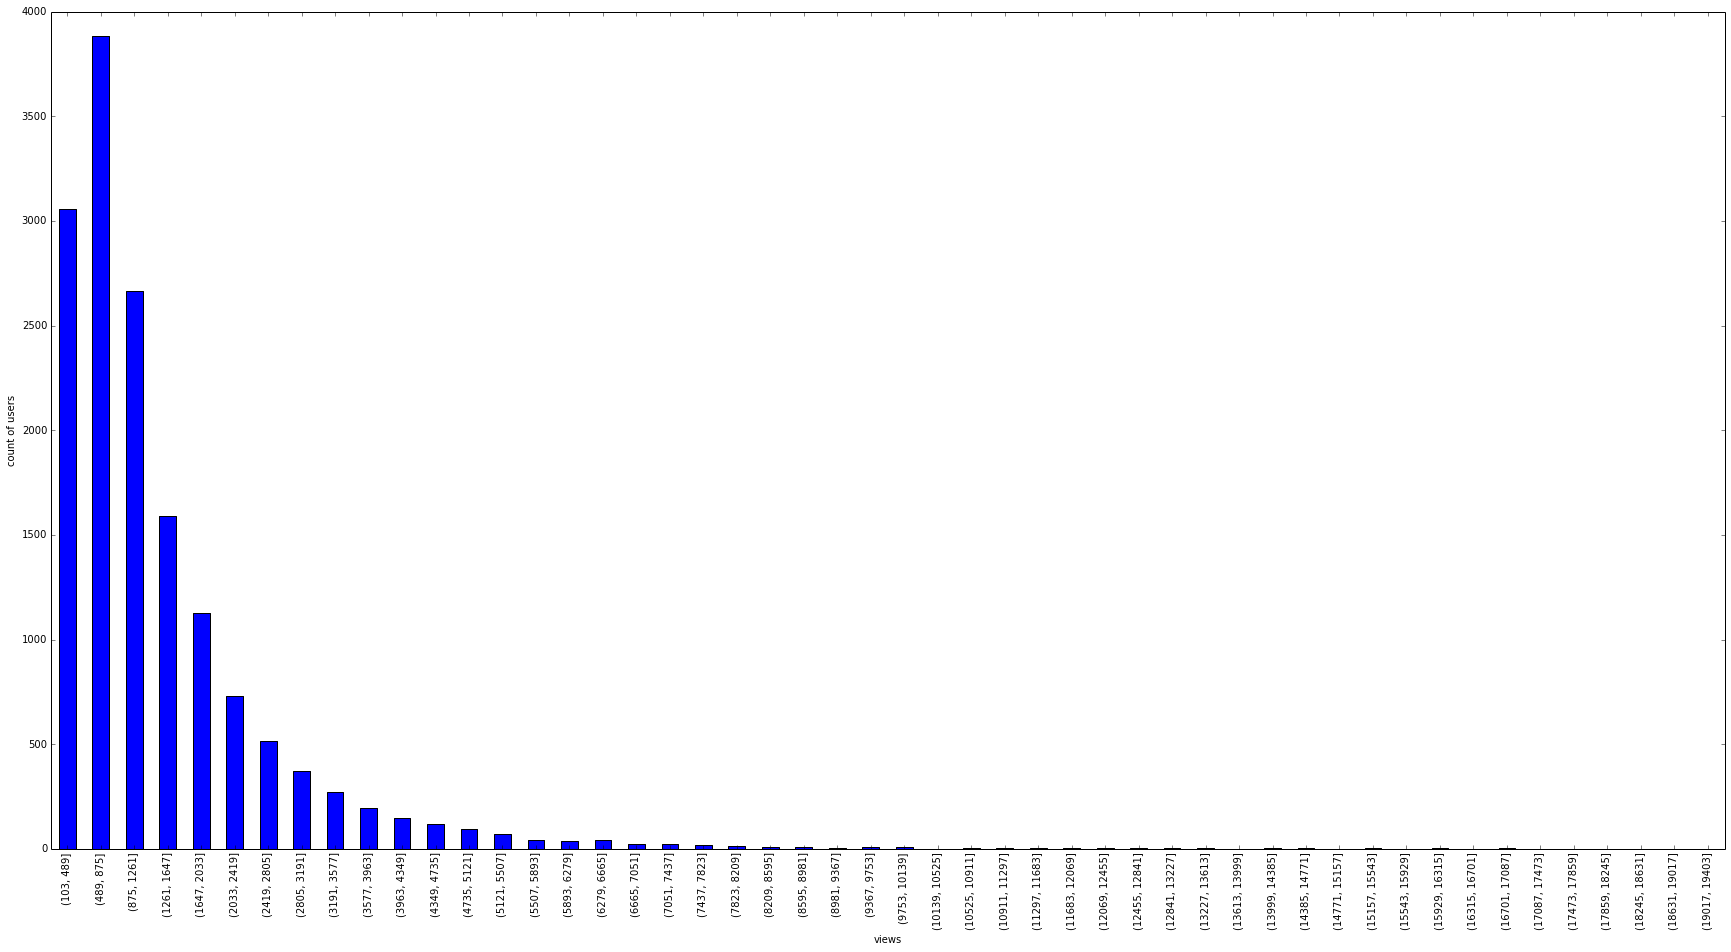

In [28]:
plt.figure(figsize=(30,15)) 
plt.xlabel('view segments')
plt.ylabel('count of users')
view_users = grouped.size()
view_users.plot.bar()

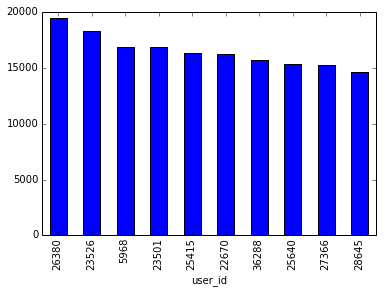

In [29]:
user_group.size().sort_values(ascending=False).head(10).plot('bar')

In [22]:
photo_group_train = user_item_train.groupby(['photo_id'])

In [23]:
photo_group_train.size()

photo_id
1           1
2           1
3           1
4           1
7           2
8           1
9           1
10          1
11          1
14          2
15          1
16          8
19          1
20          1
21          5
22          4
23          1
25          2
26          3
28          1
30          1
32          1
33          1
34          1
35          3
36          1
37          1
40          1
41          1
44          1
           ..
7560312     3
7560313     1
7560314     2
7560317     1
7560318    41
7560319     2
7560321     2
7560323     1
7560324     3
7560333     1
7560334     1
7560335    10
7560336     1
7560337    16
7560338    22
7560340     1
7560342    10
7560344     1
7560348     1
7560349     1
7560352     1
7560353     1
7560354     6
7560355     1
7560356     2
7560357     1
7560359     1
7560361     1
7560364     1
7560365     1
Length: 4278686, dtype: int64

In [24]:
photo_group_train.size().sort_values(ascending=False)

photo_id
7398856    2521
6844024    2337
7160766    2267
1182799    2228
4007059    2220
6452534    2211
1336811    2169
1429811    2135
7266201    2110
1783140    2092
4628948    2064
7228478    2060
169138     2055
5253933    2044
6747325    1988
5407737    1916
6450009    1909
3527524    1900
4848760    1885
4869619    1870
6026772    1866
2953647    1861
3203572    1860
260807     1839
6311931    1830
5958481    1804
55234      1787
4836208    1781
1267293    1775
7146675    1773
           ... 
4514930       1
4514917       1
4514915       1
4514912       1
4514998       1
4515000       1
4515005       1
4515008       1
4515054       1
4515053       1
4515052       1
4515051       1
4515050       1
4515048       1
4515043       1
4515040       1
4515039       1
4515036       1
4515033       1
4515030       1
4515029       1
4515026       1
4515025       1
4515021       1
4515020       1
4515019       1
4515017       1
4515014       1
4515013       1
1             1
Length: 4278686

In [27]:
clicks_totals = photo_group_train.sum()

In [28]:
clicks_totals.sort_values(['click', 'follow', 'like'], ascending=False)

,user_id,click,like,follow,time,playing_time,duration_time
photo_id,,,,,,,
4007059,41882958,825,5,17,1689642968116844,34379,124320
1182799,41386576,737,8,1,1695704277331982,10993,24508
1429811,40444831,696,25,1,1624903038648599,16745,36295
4628948,38726263,669,14,1,1570751587429354,8655,22704
1336811,40479838,666,15,5,1650706563333404,12585,36873
5253933,38345735,647,10,0,1555519857678514,15503,36792
7398856,47683137,646,22,3,1918608861631302,29050,141176
7266201,39494741,646,18,3,1605836524163069,11288,63300
1783140,39385130,645,23,4,1592242957932649,11511,35564


In [29]:
photo_group_train

In [36]:
text_train.head()

,photo_id,cover_words
0,1711318,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1..."
1,2758458,"278,279,280,281,282,24,283,284,285,279,286,89,..."
2,5314019,"359,360,361,362,363,364,365,366,33,367,68,368,..."
3,5735948,"508,509,510,511,512,508,513,514,515,516,517,28..."
4,3161504,"549,74,550,14,551,551,279,552,553,554,138,304,..."


In [37]:
text_train.describe()

,photo_id
count,4.278686e+06
mean,3.767701e+06
std,2.182717e+06
min,1.000000e+00
25%,1.867150e+06
50%,3.792078e+06
75%,5.648482e+06
max,7.560365e+06


In [38]:
text_test.describe()

,photo_id
count,8.958460e+05
mean,8.376024e+06
std,4.744013e+05
min,7.560367e+06
25%,7.960966e+06
50%,8.385468e+06
75%,8.782372e+06
max,9.204230e+06


In [39]:
text_test.sort_values(['photo_id'])

,photo_id,cover_words
656,7560367,0
649,7560369,"275398,43364,0,28454,826"
813,7560370,"2317,14708"
657,7560371,0
623,7560372,"3088,34083,14,34428,7452"
655,7560373,0
644,7560375,0
641,7560376,0
629,7560377,0
630,7560378,0


In [60]:
text_train_photo_ids = text_train['photo_id'].unique()
text_train['photo_id'].nunique()

4278686

In [61]:
text_test_photo_ids = text_test['photo_id'].unique()
text_test['photo_id'].nunique()

895846

In [62]:
face_train_photo_ids = face_train['photo_id'].unique()
face_train['photo_id'].nunique()

1613135

In [63]:
face_test_photo_ids = face_test['photo_id'].unique()
face_test['photo_id'].nunique()

329056

In [15]:
interaction_train_photo_ids = user_item_train['photo_id'].unique()
user_item_train['photo_id'].nunique()

4278686

In [65]:
interaction_test_photo_ids = user_item_test['photo_id'].unique()
user_item_test['photo_id'].nunique()

895846

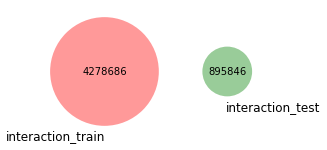

In [81]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
plt.figure(figsize=(4, 4))
venn2([set(interaction_train_photo_ids), set(interaction_test_photo_ids)], ['interaction_train', 'interaction_test'])
plt.show()

预测数据集和训练集完全没有交集，因此，对于图像文本数据，我们需要采用聚类或者求word2vec/doc2vec/tdidf 的方法来得到每一张图片的文本语义特征向量。对于人脸数据我们可以直接提取本身携带的特征（比如人脸数目、性别、平均年龄等）.

图片文本数据和交互数据训练集是完整的，我们可以构造图片文本相关完整的训练数据集，但是图片人脸数据和交互数据训练集不是完整的，有的交互数据缺失了人脸数据，而且缺失数量有1/3, 因此我们必须补齐缺失数据集。

In [70]:
len(set(interaction_train_photo_ids) & set(text_train_photo_ids))

4278686

In [69]:
len(set(interaction_train_photo_ids) & set(face_train_photo_ids))

1613135

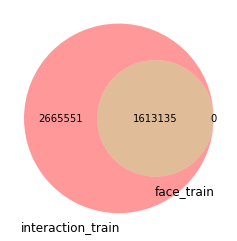

In [77]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
plt.figure(figsize=(4, 4))
venn2([set(interaction_train_photo_ids), set(face_train_photo_ids)], ['interaction_train', 'face_train'])
plt.show()

In [78]:
test_user_group = user_item_test.groupby(['user_id'])

In [12]:
face_data = pd.concat([face_train, face_test])

In [17]:
face_data_photo_ids = face_data['photo_id'].unique()

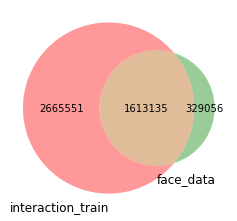

In [18]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
plt.figure(figsize=(4, 4))
venn2([set(interaction_train_photo_ids), set(face_data_photo_ids)], ['interaction_train', 'face_data'])
plt.show()

In [80]:
face_data['photo_id'].nunique()

1942191

In [34]:
face_data['face']

,photo_id
count,1.942191e+06
mean,4.546572e+06
std,2.643134e+06
min,2.000000e+00
25%,2.255444e+06
50%,4.537835e+06
75%,6.812744e+06
max,9.204228e+06


In [52]:
lower, higher = face_data.face_num.min(), face_data.face_num.max()
n_bins = 20
edges = range(lower-1, higher+1, (higher-lower+1)/n_bins)
lbs = ['(%d, %d]'%(edges[i], edges[i+1]) for i in range(len(edges)-1)]
quartiles = pd.cut(face_data.face_num, bins=n_bins, labels=lbs, include_lowest=True)
# quartiles = pd.cut(face_data.face_num, 20)
grouped = face_data.groupby(quartiles)


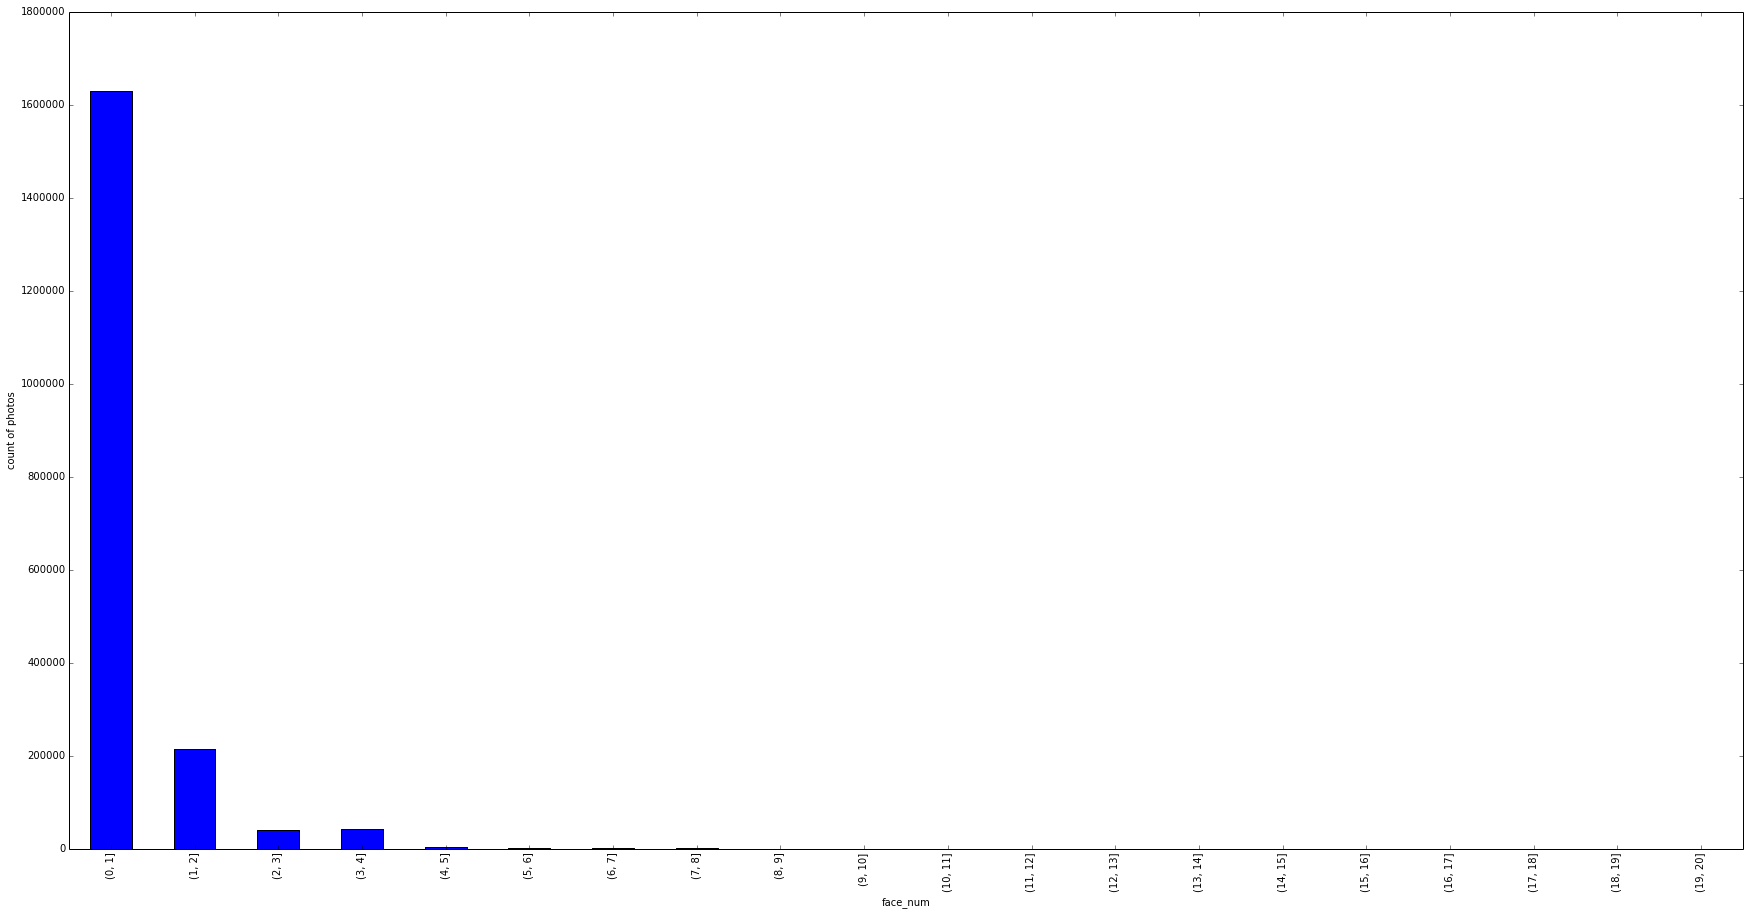

In [53]:
plt.figure(figsize=(30,15)) 
plt.xlabel('face num')
plt.ylabel('count of photos')
photos_of_face_num = grouped.size()
photos_of_face_num.plot.bar()

In [16]:
text_data = pd.concat([text_train, text_test])

text_data['photo_id'].nunique()

In [56]:
text_data['cover_words'] = text_data['cover_words'].apply(lambda words: words.split(','))

In [57]:
text_data['cover_length'] = text_data['cover_words'].apply(lambda words: len(words))

In [58]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174532 entries, 0 to 895845
Data columns (total 3 columns):
photo_id        int64
cover_words     object
cover_length    int64
dtypes: int64(2), object(1)
memory usage: 157.9+ MB


In [59]:
text_data.head()
# del text_data.cover_words_list

,photo_id,cover_words,cover_length
0,1711318,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",196
1,2758458,"[278, 279, 280, 281, 282, 24, 283, 284, 285, 2...",190
2,5314019,"[359, 360, 361, 362, 363, 364, 365, 366, 33, 3...",210
3,5735948,"[508, 509, 510, 511, 512, 508, 513, 514, 515, ...",154
4,3161504,"[549, 74, 550, 14, 551, 551, 279, 552, 553, 55...",812


In [60]:
num_features = 128
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3

from gensim.models import word2vec
import os
model = None
model_name = "128features_40minwords_10context.model"
if not os.path.exists(model_name):
    print "Training model..."
    model = word2vec.Word2Vec(text_data.cover_words,
                              workers=num_workers,
                              size=num_features,
                              min_count = min_word_count,
                              window = context,
                              sample = downsampling)
    model.init_sims(replace=True)
    model.save(model_name)

model = word2vec.Word2Vec.load(model_name)

In [61]:
model.most_similar("1")

/Library/Python/2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('58935', 0.6100905537605286),
 ('136', 0.5255597829818726),
 ('4223', 0.5230255126953125),
 ('13854', 0.5039733648300171),
 ('894', 0.4964757263660431),
 ('6552', 0.49303457140922546),
 ('3406', 0.492374062538147),
 ('2662', 0.4735864996910095),
 ('6500', 0.4696054458618164),
 ('4485', 0.4670069217681885)]

In [62]:
model.corpus_count

5174532

In [63]:
len(set(model.wv.index2word))

18212

In [64]:
import numpy as np  # Make sure that numpy is imported

def makeFeatureVec(model, num_features, words):
    featureVec = np.zeros((num_features,),dtype="float64")
    nwords = 0
    # set for fast query
    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords*1.0)
    return featureVec


def getAvgFeatureVecs(covers, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(covers),num_features),dtype="float64")
    for cover in covers:
        if counter%100000 == 0:
            print "Cover %d of %d" % (counter, len(covers))
        # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[counter] = makeFeatureVec(cover, model, \
           num_features)
        # Increment the counter
        counter = counter + 1
    return reviewFeatureVecs

In [65]:
import functools
doc2vec = functools.partial(makeFeatureVec, model, num_features)
text_data['doc_vec'] = text_data['cover_words'].apply(doc2vec)

/Library/Python/2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [66]:
text_data.head()

,photo_id,cover_words,cover_length,doc_vec
0,1711318,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",196,"[0.037359587283448334, -0.021069745961675778, ..."
1,2758458,"[278, 279, 280, 281, 282, 24, 283, 284, 285, 2...",190,"[0.04937126344937343, 0.006695980785403356, 0...."
2,5314019,"[359, 360, 361, 362, 363, 364, 365, 366, 33, 3...",210,"[0.023238167087598936, 0.003954793307904504, 0..."
3,5735948,"[508, 509, 510, 511, 512, 508, 513, 514, 515, ...",154,"[-0.008164023301206826, -0.025060332344663847,..."
4,3161504,"[549, 74, 550, 14, 551, 551, 279, 552, 553, 55...",812,"[0.023310633784893, -0.001788568143117796, 0.0..."


In [68]:
# text_data_vec = getAvgFeatureVecs(model, num_features, text_data['cover_words'])
text_data['doc_vec'].to_csv('text_data_docvec.csv')

In [ ]:
from sklearn.cluster import KMeans
import time

start = time.time() # Start time

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
word_vectors = model.wv.syn0
num_clusters = word_vectors.shape[0] / 5

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print "Time taken for K Means clustering: ", elapsed, "seconds."

In [ ]:
face_text_data = pd.merge(face_data, text_data, how='left', on=['photo_id'] )

In [ ]:
face_text_data.head()

In [ ]:
del face_text_data['cover_words']

In [ ]:
face_text_data.fillna(0)

In [ ]:
train = pd.merge(user_item_train, face_train, how='left',on=['photo_id'])